In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# load the stroke dataset
stroke_df = pd.read_csv(r"C:\Users\sp728943\Desktop\healthcare-dataset-stroke-data.csv")


In [2]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.shape

(5110, 12)

In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sp728943\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

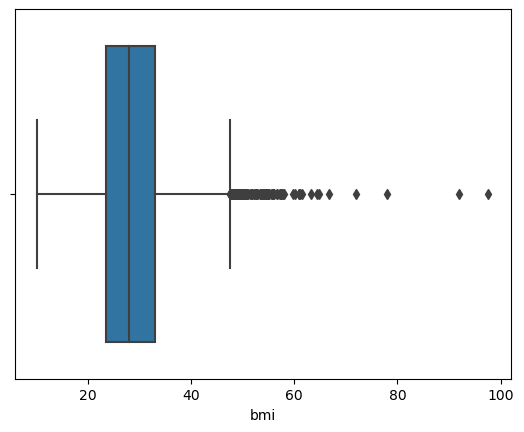

In [7]:
sns.boxplot(stroke_df['bmi'])

In [8]:
stroke_df['bmi']=stroke_df['bmi'].fillna(stroke_df['bmi'].median())

In [9]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
enc=LabelEncoder()

In [12]:
stroke_df=stroke_df.apply(enc.fit_transform)

In [13]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,154,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [14]:
x=stroke_df.drop(columns=['id','stroke'])
y=stroke_df['stroke']

In [15]:
y.value_counts()


0    4861
1     249
Name: stroke, dtype: int64

In [16]:
x.shape

(5110, 10)

In [17]:
y.shape

(5110,)

In [18]:
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

In [19]:
x_res.shape

(9722, 10)

In [20]:
y_res.shape

(9722,)

In [21]:
y_res.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [22]:
x_res.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,88,0,1,1,2,1,3850,239,1
1,0,82,0,0,1,3,0,3588,154,2
2,1,101,0,1,1,2,0,2483,198,2
3,0,70,0,0,1,2,1,3385,217,3
4,0,100,1,0,1,3,0,3394,113,2


In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
sc=StandardScaler()

In [25]:
x_new=sc.fit_transform(x_res)

In [26]:
x_new=pd.DataFrame(x_new,columns=x_res.columns)

In [27]:
x_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.455687,0.569209,-0.303705,4.312865,0.624698,0.037280,1.204714,1.470860,1.161773,-0.282347
1,-0.686312,0.294576,-0.303705,-0.231864,0.624698,1.064021,-0.830072,1.252897,-0.182575,0.752711
2,1.455687,1.164247,-0.303705,4.312865,0.624698,0.037280,-0.830072,0.333622,0.513322,0.752711
3,-0.686312,-0.254689,-0.303705,-0.231864,0.624698,0.037280,1.204714,1.084016,0.813824,1.787769
4,-0.686312,1.118475,3.292667,-0.231864,0.624698,1.064021,-0.830072,1.091504,-0.831026,0.752711


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_res,test_size=0.2,random_state=957)

In [30]:
x_train.shape

(7777, 10)

In [31]:
x_test.shape

(1945, 10)

In [32]:
y_train.shape

(7777,)

In [33]:
y_test.shape

(1945,)

In [34]:
from sklearn.linear_model import LogisticRegression 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn.svm import SVC

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
Lr=LogisticRegression()

In [39]:
Knn=KNeighborsClassifier()

In [40]:
Svm=SVC(probability=True)

In [41]:
Nb=GaussianNB()

In [42]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
Svm.fit(x_train,y_train)

SVC(probability=True)

In [45]:
Nb.fit(x_train,y_train)

GaussianNB()

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [47]:
y_pred_Lr=Lr.predict(x_test)
y_pred_Knn=Knn.predict(x_test)
y_pred_Svm=Svm.predict(x_test)
y_pred_Nb=Nb.predict(x_test)


C:\Users\sp728943\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
y_pred_Lr_prob=Lr.predict_proba(x_test)
y_pred_Knn_prob=Knn.predict_proba(x_test)
y_pred_Svm_prob=Svm.predict_proba(x_test)
y_pred_Nb_prob=Nb.predict_proba(x_test)

In [49]:
print('logistic regression')
print(accuracy_score(y_test,y_pred_Lr))
print(confusion_matrix(y_test,y_pred_Lr))
print(classification_report(y_test,y_pred_Lr))
print(roc_auc_score(y_test, y_pred_Lr_prob[:,1]))


logistic regression
0.8107969151670951
[[776 231]
 [137 801]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1007
           1       0.78      0.85      0.81       938

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945

0.8891776752497973


In [50]:
print('Knn')
print(accuracy_score(y_test,y_pred_Knn))
print(confusion_matrix(y_test,y_pred_Knn))
print(classification_report(y_test,y_pred_Knn))
print(roc_auc_score(y_test, y_pred_Knn_prob[:,1]))

Knn
0.867866323907455
[[800 207]
 [ 50 888]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1007
           1       0.81      0.95      0.87       938

    accuracy                           0.87      1945
   macro avg       0.88      0.87      0.87      1945
weighted avg       0.88      0.87      0.87      1945

0.935220513971496


In [51]:
print('Svm')
print(accuracy_score(y_test,y_pred_Svm))
print(confusion_matrix(y_test,y_pred_Svm))
print(classification_report(y_test,y_pred_Svm))
print(roc_auc_score(y_test, y_pred_Knn_prob[:,1]))

Svm
0.8652956298200514
[[832 175]
 [ 87 851]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      1007
           1       0.83      0.91      0.87       938

    accuracy                           0.87      1945
   macro avg       0.87      0.87      0.87      1945
weighted avg       0.87      0.87      0.87      1945

0.935220513971496


In [52]:
print('Nb')
print(accuracy_score(y_test,y_pred_Nb))
print(confusion_matrix(y_test,y_pred_Nb))
print(classification_report(y_test,y_pred_Nb))
print(roc_auc_score(y_test, y_pred_Nb_prob[:,1]))

Nb
0.794344473007712
[[697 310]
 [ 90 848]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1007
           1       0.73      0.90      0.81       938

    accuracy                           0.79      1945
   macro avg       0.81      0.80      0.79      1945
weighted avg       0.81      0.79      0.79      1945

0.8757281121700337


In [53]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_Lr_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_Knn_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_Svm_prob[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_Nb_prob[:,1], pos_label=1)                    

In [54]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

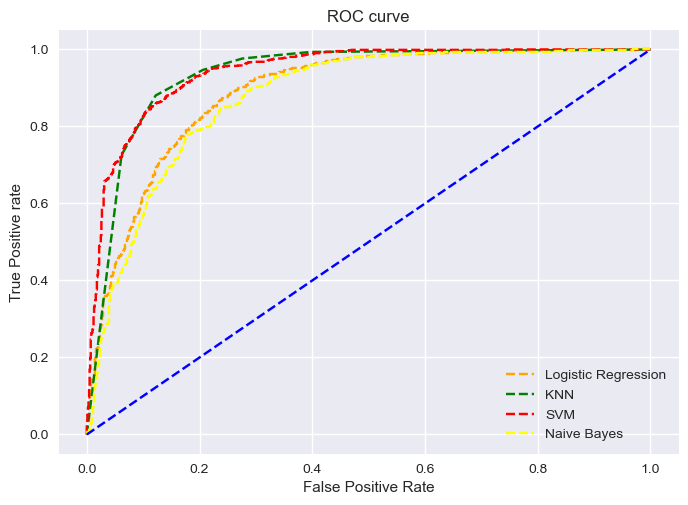

In [55]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

We can choose either knn or svm those are best models out of all the models.